In [ ]:
# !pip install opencv-python-headless
# !pip install tensorflow


In [ ]:
# pip install matplotlib

In [ ]:
# pip install numpy

In [ ]:
# pip install opencv-python

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
# Oragnizando as variaveis (rotulos e imagens) de treino e de teste em tuplas
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

# Normalizando as imagens, escalando a um valor de 0 a 1 (0 - valor minimo, 255 - valor maximo)
training_images, testing_images = training_images / 255, testing_images / 255

# Rotulos
class_names = ['Avião', 'Carro', 'Pássaro', 'Gato', 'Cervo', 'Cachorro', 'Sapo', 'Cavalo', 'Barco', 'Caminhão' ]
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


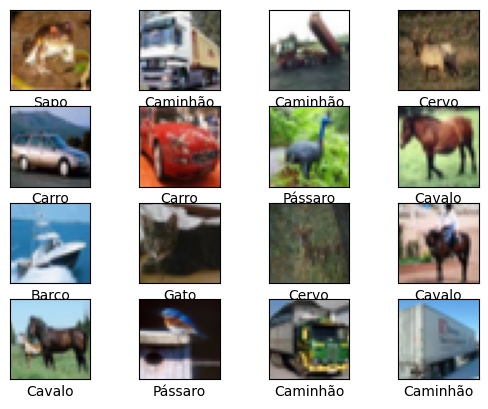

In [ ]:
# Iterar pela grid (grid 4x4),sem sitema de coordenadas
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])

plt.show()

In [ ]:
# Limitar o numero de imagens a ser utilizadas (salvar tempo e recursos, porem reduz a precisao)
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

# Modelo
model = models.Sequential()
# Convolution Layer -> filtrar caracteristicas em uma imagem
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3))) # 32x32 pixels, 3 color channels
model.add(layers.MaxPooling2D((2,2))) # Simplifica o resultado em informacoes uteis

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten()) # deixar o input 1 dimensional (10 por 10 = 1 x 100)
model.add(layers.Dense(64, activation='relu')) # Camada densa de complexidade
model.add(layers.Dense(10, activation='softmax')) # escalar resultados para porcentagens de classificacoes individuais

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.2571 - loss: 1.9767 - val_accuracy: 0.4428 - val_loss: 1.5371
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.4936 - loss: 1.4047 - val_accuracy: 0.5268 - val_loss: 1.3041
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.5555 - loss: 1.2519 - val_accuracy: 0.5670 - val_loss: 1.2157
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.6006 - loss: 1.1319 - val_accuracy: 0.5788 - val_loss: 1.1638
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.6327 - loss: 1.0550 - val_accuracy: 0.6160 - val_loss: 1.1006
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.6459 - loss: 1.0023 - val_accuracy: 0.6105 - val_loss: 1.1379
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 55ms/step - accuracy: 0.6796 - loss: 0.9179 - val_accuracy: 0.6345 - val_loss: 1.0633
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.6948 - loss: 0.8733 - 

In [ ]:
# Salvar o modelo
from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/MyDrive/image_classifier.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Model

from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/image_classifier.h5')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Predição: Cavalo
Probabilidade: 99.68944787979126%


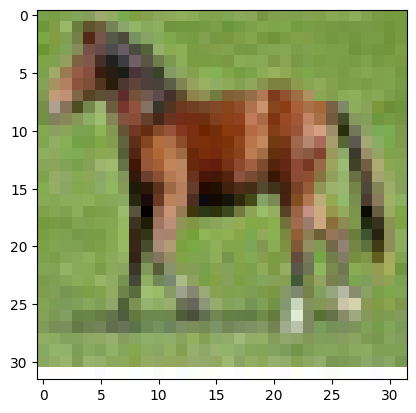

In [ ]:
# Carregar imagem (cavalo) do drive
img = cv.imread('/content/drive/MyDrive/imagens/cavalo.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f"Predição: {class_names[index]}")
print(f"Probabilidade: {prediction[0][index]*100}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predição: Cervo
Probabilidade: 85.26809811592102%


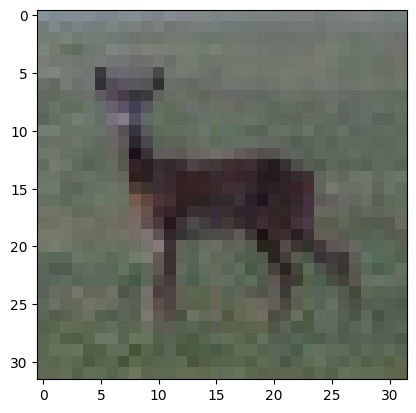

In [ ]:
# Carregar imagem (cervo) do drive
img = cv.imread('/content/drive/MyDrive/imagens/cervo.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f"Predição: {class_names[index]}")
print(f"Probabilidade: {prediction[0][index]*100}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predição: Cachorro
Probabilidade: 84.95461344718933%


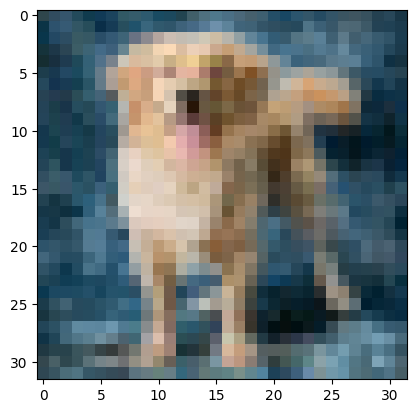

In [28]:
# Carregar imagem (cachorro) do drive
img = cv.imread('/content/drive/MyDrive/imagens/cachorro.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f"Predição: {class_names[index]}")
print(f"Probabilidade: {prediction[0][index]*100}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predição: Gato
Probabilidade: 83.60629081726074%


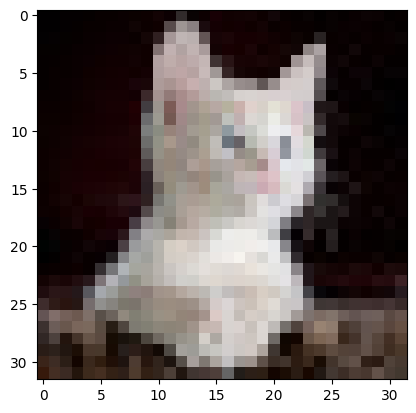

In [37]:
# Carregar imagem (gato) do drive
img = cv.imread('/content/drive/MyDrive/imagens/gato.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f"Predição: {class_names[index]}")
print(f"Probabilidade: {prediction[0][index]*100}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predição: Avião
Probabilidade: 83.95568132400513%


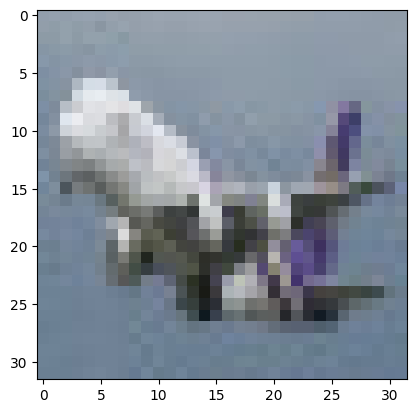

In [38]:
# Carregar imagem (aviao) do drive
img = cv.imread('/content/drive/MyDrive/imagens/aviao.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f"Predição: {class_names[index]}")
print(f"Probabilidade: {prediction[0][index]*100}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predição: Avião
Probabilidade: 64.5527184009552%


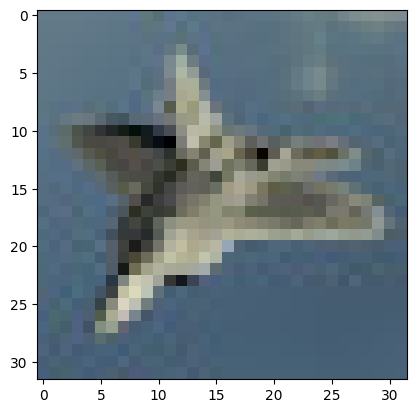

In [23]:
# Carregar imagem (aviao2) do drive
img = cv.imread('/content/drive/MyDrive/imagens/aviao2.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f"Predição: {class_names[index]}")
print(f"Probabilidade: {prediction[0][index]*100}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predição: Avião
Probabilidade: 81.87491297721863%


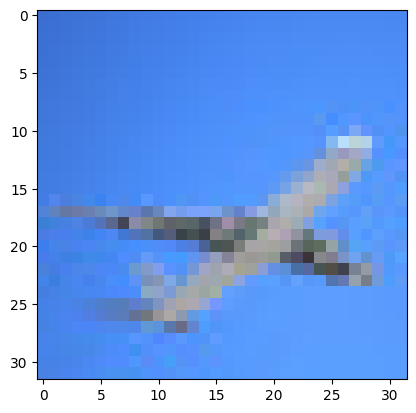

In [25]:
# Carregar imagem (aviao) do drive
img = cv.imread('/content/drive/MyDrive/imagens/aviao3.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f"Predição: {class_names[index]}")
print(f"Probabilidade: {prediction[0][index]*100}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predição: Caminhão
Probabilidade: 81.63354396820068%


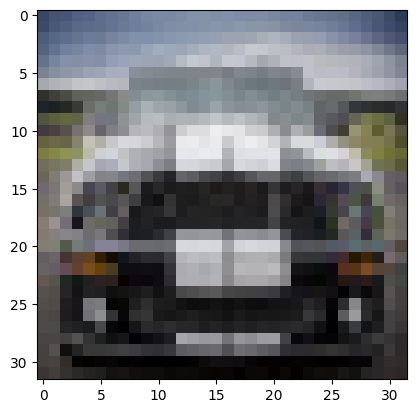

In [ ]:
# Carregar imagem (carro) do drive
img = cv.imread('/content/drive/MyDrive/imagens/carro.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f"Predição: {class_names[index]}")
print(f"Probabilidade: {prediction[0][index]*100}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predição: Carro
Probabilidade: 99.86283779144287%


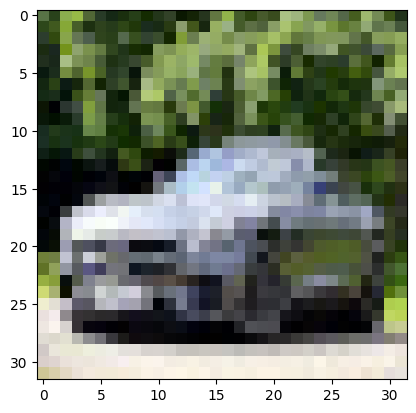

In [ ]:
# Carregar imagem (carro 2) do drive
img = cv.imread('/content/drive/MyDrive/imagens/carro2.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f"Predição: {class_names[index]}")
print(f"Probabilidade: {prediction[0][index]*100}%")